# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

dados = pd.read_csv("nhanes_2015_2016.csv")

In [ ]:
print(dados['RIDAGEYR'])

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [10]:
# insert your code here
dados['estadocivil'] = dados.DMDMARTL.replace({1:"Married", 2:"Widowed", 3:"Divorced", 4:"Separeted",5:"Never Married", 
                                       6:"Living with partner",77:"Refused",99:"Don't Know"})

dados["estadocivil"] = dados.estadocivil.fillna("Missing")

x = dados.estadocivil.value_counts()
x/x.sum()

Married                0.484743
Never Married          0.175065
Divorced               0.100959
Living with partner    0.091892
Widowed                0.069050
Missing                0.045510
Separeted              0.032432
Refused                0.000349
Name: estadocivil, dtype: float64

In [6]:
dados['genero'] = dados.RIAGENDR.replace({1:"Male",2:"Female"})

In [11]:
daHm=dados[dados['genero']=="Male"]

y=daHm.estadocivil.value_counts()
y/y.sum()

Married                0.535339
Never Married          0.175426
Living with partner    0.096049
Divorced               0.083001
Missing                0.048931
Widowed                0.036245
Separeted              0.024647
Refused                0.000362
Name: estadocivil, dtype: float64

In [12]:
daMl=dados[dados['genero']=="Female"]

z=daMl.estadocivil.value_counts()
z/z.sum()

Married                0.437836
Never Married          0.174731
Divorced               0.117608
Widowed                0.099462
Living with partner    0.088038
Missing                0.042339
Separeted              0.039651
Refused                0.000336
Name: estadocivil, dtype: float64

In [13]:
daTds=dados[dados['RIDAGEYR'].between(30,40)]

w=daTds.estadocivil.value_counts()
w/w.sum()

Married                0.545809
Never Married          0.211501
Living with partner    0.139376
Divorced               0.068226
Separeted              0.029240
Widowed                0.004873
Refused                0.000975
Name: estadocivil, dtype: float64

In [18]:
daTds=dados[dados['RIDAGEYR'].between(30,40)]

damlh= daTds[daTds['genero']=="Female"]
u=damlh.estadocivil.value_counts()
u/u.sum()

Married                0.535714
Never Married          0.218045
Living with partner    0.122180
Divorced               0.086466
Separeted              0.033835
Widowed                0.003759
Name: estadocivil, dtype: float64

In [20]:
daTds=dados[dados['RIDAGEYR'].between(30,40)]

dahms= daTds[daTds['genero']=="Male"]
m=dahms.estadocivil.value_counts()
m/m.sum()

Married                0.556680
Never Married          0.204453
Living with partner    0.157895
Divorced               0.048583
Separeted              0.024291
Widowed                0.006073
Refused                0.002024
Name: estadocivil, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [35]:
# insert your code here
# estes comandos abaixo foram realizados a fim de conhecer as principais estatísticas dos dados

mulhs = dados[dados['genero']=="Female"]

mulhs.RIDAGEYR.dropna().describe()

count    2976.000000
mean       47.793011
std        18.299419
min        18.000000
25%        32.000000
50%        47.000000
75%        62.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [45]:
# agrupamento dos dados conforme intervalos de dados

mulhs["agegrp"]= pd.cut(dados.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])


a = mulhs.groupby("agegrp")["estadocivil"].value_counts()
a = a.unstack()
a = a.apply(lambda x: x/x.sum(), axis=1)
print(a.to_string(float_format="%.3f"))

estadocivil  Divorced  Living with partner  Married  Missing  Never Married  Refused  Separeted  Widowed
agegrp                                                                                                  
(18, 20]          NaN                0.084    0.011    0.589          0.316      NaN        NaN      NaN
(20, 30]        0.021                0.206    0.305      NaN          0.446      NaN      0.021      NaN
(30, 40]        0.091                0.120    0.544      NaN          0.205      NaN      0.036    0.004
(40, 50]        0.137                0.074    0.574      NaN          0.125      NaN      0.066    0.024
(50, 60]        0.177                0.068    0.547      NaN          0.089    0.002      0.057    0.060
(60, 70]        0.193                0.043    0.481      NaN          0.086      NaN      0.050    0.147
(70, 80]        0.144                0.007    0.317      NaN          0.051      NaN      0.020    0.461


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [ ]:
# insert your code here

hmns = dados[dados['genero']=="Male"

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

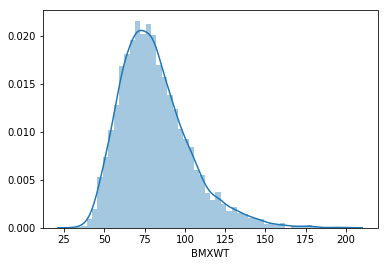

In [47]:
# insert your code here

sns.distplot(dados.BMXWT.dropna())

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

In [ ]:
# insert your code here

sns.distplot(mulhs.BMXWT.dropna())

In [ ]:
sns.distplot(hmns.BMXWT.dropna())

In [ ]:
sns.boxplot(x = dados["BMXWT"], y = dados["genero"])

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.